# Exercises Neural Networks

In [49]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

# Guidelines
1. Activation function for hidden layers: relu or sigmoid are popular.
2. Activation function for the output layer:
    - Classification with one-hot encoding: softmax (provides probabilities for each output summing to 1).
    - Classification with 2 classes and 1 output: sigmoid (provides 1 probability). PS: One-hot encoding can also be used for 2 classes (then you have 2 outputs).
    - Regression: linear.
3. Backpropagation algorithm: Adam is popular (learning_rate indicates how much the weights/biases are adjusted).
4. Loss function:
    - Classification with one-hot encoding: `categorical_crossentropy` (a type of distance between probabilities).
    - Classification with 2 classes and 1 output: `binary_crossentropy`.
    - Regression: `MeanSquaredError` or `MeanAbsoluteError`.
5. Metrics can be optionally added.
6. Epochs: Number of times you iterate over the entire training dataset.
7. Batch size: Size of the batch (default is 32) after which backpropagation (adjustment of weights/biases) occurs. For example, if the training dataset contains 1000 samples and the batch size is 100, there will be 10 backpropagation per epoch.

|                                | Output Activation | Loss                     | Metrics                       |
|:-------------------------------|:------------------|:-------------------------|:------------------------------|
| Regression                     | Linear            | MeanSquaredError()       | MeanAbsolutePercentageError() |
|                                |                   | MeanAbsoluteError()      |                               |
| Classificatie 1 output         | Sigmoid           | Binary_crossentropy      | Accuracy                      |
| Classificatie one-hot encoding | Softmax           | Categorical_crossentropy | Accuracy                      |


In [50]:
infoTable = pd.DataFrame({
    "Scenario": ["Binary Classification", "Multi-Class Classification", "Regression"],
    "Output Activation": ["Sigmoid", "Softmax", "Linear"],
    "Loss": ["binary_crossentropy", "categorical_crossentropy", "mean_squared_error"],
    "Metrics": ["accuracy", "accuracy", "mean_squared_error"]
})

display(infoTable)

,Scenario,Output Activation,Loss,Metrics
0,Binary Classification,Sigmoid,binary_crossentropy,accuracy
1,Multi-Class Classification,Softmax,categorical_crossentropy,accuracy
2,Regression,Linear,mean_squared_error,mean_squared_error


- Binary Classification:
    - Output Activation: **Sigmoid**
    - Loss: **Binary_crossentropy**
    - Metrics: **Accuracy**

- Multi-Class Classification:
    - Output Activation: **Softmax**
    - Loss: **Categorical_crossentropy**
    - Metrics: **Accuracy**

- Regression:
    - Output Activation: **Linear** ***(no activation function)***
    - Loss: **Mean_squared_error**
    - Metrics: **Mean_squared_error**

## Theoretical questions
> **Goal**: The goal is to train and neural network so that it can predict future values based on input data.

### Question 0: XOR ANN (Artificial Neural Network)

In [51]:
# Stap 1: Data
xor_data = pd.DataFrame({'P1': [0,1,0,1], 
                         'P2': [0,0,1,1], 
                         'Q' : [0,1,1,0]})
x_xor_data= xor_data[['P1', 'P2']]
y_xor_data = xor_data[['Q']]
                       
# Step 2: Model
inputs_xor = Input(shape=(2,))
x_xor = Dense(2, activation='sigmoid')(inputs_xor) # Or relu
outputs_xor = Dense(1, activation='sigmoid')(x_xor) # Or relu
model_xor = Model(inputs_xor, outputs_xor, name='XOR_NN')

# Step 3: Compile
model_xor.compile(optimizer=Adam(learning_rate=0.00001), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [52]:
# Step 4: Fit
history_xor = model_xor.fit(
                            x_xor_data, 
                            y_xor_data, 
                            epochs=200, 
                            callbacks=[PlotLossesKeras()], 
                            verbose=False)

accuracy
	accuracy         	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	loss             	 (min:    0.757, max:    0.758, cur:    0.757)


In [53]:
model_xor.summary()

Model: "XOR_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

### Question 1: The Simpsons Revisited
- We want to be able to predict the gender of a Simpson using... a neural network. This dataset is very small, and therefore we cannot construct a validation set or test set.
    - Read the Simpsons dataset (`../Data/The_Simpsons_Original.csv`).
    - Determine which columns we cannot use with this prediction? Regression or classification?
    - Determine which columns we cannot use in this prediction?
    - Now create an input training data set `x_simpsons` and normalize it (min-max normalization). Do the same for the output column(`y_simpsons`).
    - Create a neural network with the correct inputs and outputs.
    - Use your neural network to predict the gender of your `x_simpsons`. Do they match the targets? Also predict the gender of the unknown Simpson (Comic guy: `hairlenght=8`, `weight=500`, `age=38`).

**Name of Columns**: `name` `hair length` `weight` `age` `gender`

In [54]:
# Load in data and filter data
theSimpsonsOriginal = pd.read_csv('../Data/The_Simpsons_Original.csv', delimiter=',')

# Determine how we are going to use the data set
print(colored(f"As input we are going to use every column that is interval or ratio. And obviously we are going to use it as a classifier, and more specifically a binary classifier because it's male or female (M/F).\n", outputColor))

# Determine which columns we cannot use
print(colored(f"We can obviously not use nominaal or ordinaal column.", outputColor))

As input we are going to use every column that is interval or ratio. And obviously we are going to use it as a classifier, and more specifically a binary classifier because it's male or female (M/F).

We can obviously not use nominaal or ordinaal column.


In [55]:
warnings.filterwarnings("ignore")                                                                                                   # Disable warnings

# Split up the necessary data 
x_simpsons = theSimpsonsOriginal[['hair length', 'weight', 'age']]                                                                  # Get the input
y_simpsons = theSimpsonsOriginal['gender']                                                                                          # Get the output

# Normalize and convert input and output fields
x_simpsons_normalize = (x_simpsons - x_simpsons.min()) / (x_simpsons.max() - x_simpsons.min())                                      # Normalization of the input
y_simpsons_replace = y_simpsons.replace(to_replace=['M', 'F'], value=[0, 1])                                                        # Replace the output
y_simpsons_replace = to_categorical(y_simpsons_replace)                                                                             # One-hot encoding

In [56]:
# Create (ANN) artificial neural network
inputs_simpsons = Input(shape=(3,))
x_simpsons_model = Dense(6, activation='sigmoid')(inputs_simpsons)
x_simpsons_model = Dense(12, activation='sigmoid')(x_simpsons_model)
x_simpsons_model = Dense(24, activation='sigmoid')(x_simpsons_model)
x_simpsons_model = Dense(12, activation='sigmoid')(x_simpsons_model)
x_simpsons_model = Dense(6, activation='sigmoid')(x_simpsons_model)
outputs_simpsons = Dense(2, activation='sigmoid')(x_simpsons_model)
model_simpsons = Model(inputs_simpsons, outputs_simpsons, name='Simpsons_NN')                                                   # Softmax for one-hot encoding (classification)

# Compile the model
model_simpsons.compile(optimizer=Adam(learning_rate=0.00001), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])      # Binary_crossentropy for one-hot encoding

# Fit the model
history_simpsons = model_simpsons.fit(
                                    x_simpsons_normalize,                   # Input
                                    y_simpsons_replace,                     # Output
                                    epochs=200,                             # Number of epochs (epochs = iterations over all the dataset)
                                    callbacks=[PlotLossesKeras()],          # Plot the losses
                                    verbose=False)                          # Fit the model

accuracy
	accuracy         	 (min:    0.444, max:    0.444, cur:    0.444)
Loss
	loss             	 (min:    0.716, max:    0.719, cur:    0.716)


In [57]:
# Get a summary of the model
model_simpsons.summary()

Model: "Simpsons_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,438 (9.53 KB)

 Trainable params: 812 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626 (6.36 KB)

In [58]:
# Use the model for prediction
predicted = model_simpsons.predict(x_simpsons_normalize)                                                                            # Predict the output
predicted = np.argmax(predicted, axis=1)                                                                                            # Get the highest value
predicted = np.where(predicted == 0, 'M', 'F')                                                                                      # Replace the output
original = y_simpsons.values                                                                                                        # Get the original output

print(colored(f"Predicted values:  {predicted}", outputColor))
print(colored(f"Original values:   {original}", outputColor))

# Evaluate the model
correct = np.mean(predicted == original)                                                                                            # Get the mean of the correct predictions
print(colored(f"\nThe percentage of Simpsons that are correctly classified is: {round(correct, 2) * 100}%", outputColor))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted values:  ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
Original values:   ['M' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'M']

The percentage of Simpsons that are correctly classified is: 44.0%


In [59]:
# Use the model for prediction on new input data
comicGuy = pd.DataFrame({'hair length': [8], 'weight': [500], 'age': [38]})                                                         # Create a new dataframe (Test Data)
comicGuy_normalize = (comicGuy - x_simpsons.min()) / (x_simpsons.max() - x_simpsons.min())                                          # Normalize the input
prediction = model_simpsons.predict(comicGuy_normalize)                                                                             # Predict the output
prediction = np.argmax(prediction, axis=1)                                                                                          # Get the highest value
prediction = np.where(prediction == 0, 'M', 'F')                                                                                    # Replace the output
print(colored(f"The prediction for the comic guy is: {prediction}", outputColor))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The prediction for the comic guy is: ['F']


### Question 2: Forecast demo Revisited
- We want to be able to predict a company's revenues per quarter for the last `5` years. This dataset is very small, and therefore we cannot construct a validation set or test set.
    - Read the Forecasting dataset (`../Data/ForcastDemo.csv`)
    - Determine which columns we cannot use in this prediction? Regression or classification?
    - Now create an input training data set `x_forcast` and an output column `y_forcast`. Normalize where necessary.
    - Create a neural network with the correct inputs and outputs.
    - Use your neural network to predict the returns associated with `x_forcast`. Do they correspond to actual returns? Create one plot of the original data and the predicted data.

**Name of Columns**: `Year` `Quarter` `Revenu`

In [60]:
# Load in data and filter data
forcastDemo = pd.read_csv('../Data/ForcastDemo.csv', delimiter=';')

# Determine how we are going to use the data set
print(colored(f"The 'Year' and 'Quarters' column we can use as input and as output the 'Revenu' column. The output will be revenue, therefore it will be a regression not a classification.\n", outputColor))

The 'Year' and 'Quarters' column we can use as input and as output the 'Revenu' column. The output will be revenue, therefore it will be a regression not a classification.



In [61]:
# Split up the necessary data 
x_forcast = forcastDemo[['Year', 'Quarter']]                                                                                        # Get the input
y_forcast = forcastDemo['Revenu']                                                                                                   # Get the output

print(colored(f"We don't need to normalize.", outputColor))

We don't need to normalize.


In [62]:
# Create (ANN) artificial neural network
inputs_forcast = Input(shape=(2,))
x_forcast_model = Dense(64, activation='relu')(inputs_forcast)
x_forcast_model = Dense(64, activation='relu')(x_forcast_model)
x_forcast_model = Dense(64, activation='relu')(x_forcast_model)
outputs_forcast = Dense(1, activation='linear')(x_forcast_model)                                                            # Linear for regression
model_forcast = Model(inputs_forcast, outputs_forcast, name='forcast_NN')                                                   # relu for regression

# Compile the model
model_forcast.compile(optimizer=Adam(learning_rate=0.001),                                                                  # Adam for regression
                      loss=keras.losses.MeanAbsoluteError(),                                                                # MeanAbsoluteError for regression
                      metrics=[keras.metrics.MeanAbsolutePercentageError()])                                                # MeanAbsolutePercentageError for regression

# Fit the model
history_forcast = model_forcast.fit(
                                x_forcast,                              # Input
                                y_forcast,                              # Output
                                epochs=100,                             # Number of epochs (epochs = iterations over all the dataset)
                                callbacks=[PlotLossesKeras()],          # Plot the losses
                                verbose=False)                          # Fit the model

Loss
	loss             	 (min:   85.070, max:  160.084, cur:   85.115)
mean_absolute_percentage_error
	mean_absolute_percentage_error 	 (min:   70.111, max:  147.749, cur:  147.749)


In [63]:
# Get a summary of the model
model_simpsons.summary()

Model: "Simpsons_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,438 (9.53 KB)

 Trainable params: 812 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626 (6.36 KB)

In [64]:
model_forcast.evaluate(x_forcast, y_forcast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 85.2502 - mean_absolute_percentage_error: 149.0750


[85.25019836425781, 149.0750274658203]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


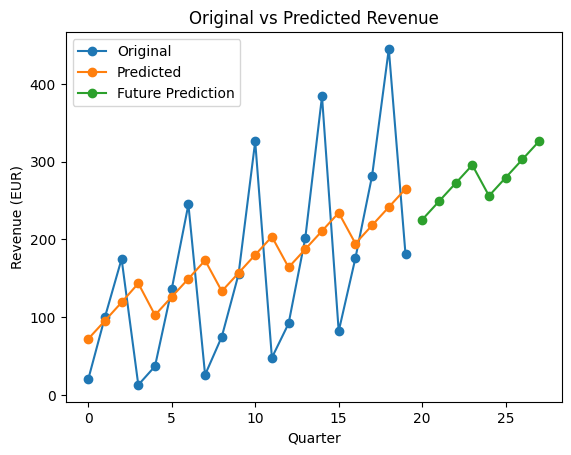

In [65]:
# Use the model for prediction
predicted = model_forcast.predict(x_forcast)                                                                                       # Predict the output
original = y_forcast.values                                                                                                        # Get the original output

# Also attempt to predict the future. You know, just for fun :)
future = pd.DataFrame({'Year': [6, 6, 6, 6, 7, 7, 7, 7], 'Quarter': [1, 2, 3, 4, 1, 2, 3, 4]})                                     # Create a new dataframe (Test Data)
predicted_future = model_forcast.predict(future)                                                                                   # Predict the output

plt.figure()
plt.plot(range(0, len(forcastDemo)), original, 'o-', label='Original')
plt.plot(range(0, len(forcastDemo)), predicted[:, 0], 'o-', label='Predicted')
plt.plot(range(len(forcastDemo), len(forcastDemo) + len(future)), predicted_future, 'o-', label='Future Prediction')
plt.xlabel('Quarter')
plt.ylabel('Revenue (EUR)')
plt.title('Original vs Predicted Revenue')
plt.legend()
plt.show()

### Question 3: Iris
- Load the iris dataset (`iris.csv`) and study its contents.
- Determine which columns we cannot use in this prediction?
- Now create an input data set `x_iris` and normalize it. Try one of the normalization techniques that you have not yet used in an exercise or assignment.
- Create a training data set and a test data set (`x_train_iris` and `x_test_iris`) consisting of `80%` and `20%` (randomly chosen) of the input data set `x_iris` respectively.
- Create a neural network with the correct inputs and outputs.
- Evaluate your neural network on your test data set (`x_test_iris`). What accuracy do you achieve?

**Name of Columns**: `sepal length` `sepal width` `petal length` `petal width` `target`

In [66]:
# 1
iris = pd.read_csv('../Data/Iris.csv', delimiter=',', decimal='.')
display(iris.head())

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
# 2
print("We can't use the column 'target' in this prediction. It's a string.")

We can't use the column 'target' in this prediction. It's a string.


In [68]:
# 3
x_iris = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]                                       # Get the input
y_iris = iris[['target']]                                                                                           # Get the output

x_iris_norm = (x_iris - x_iris.min()) / (x_iris.max() - x_iris.min())                                               # Normalization of the input
y_iris_rep = y_iris.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2])       # Replace the output
y_iris_cat = to_categorical(y_iris_rep)                                                                             # One-hot encoding

In [69]:
# 3
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(x_iris_norm, y_iris_cat, test_size=0.2)     # Split the data
display(x_train_iris.head()) # 80%
display(x_test_iris.head())  # 20%

,sepal length,sepal width,petal length,petal width
26,0.194444,0.583333,0.101695,0.125000
38,0.027778,0.416667,0.050847,0.041667
12,0.138889,0.416667,0.067797,0.000000
29,0.111111,0.500000,0.101695,0.041667
40,0.194444,0.625000,0.050847,0.083333


,sepal length,sepal width,petal length,petal width
6,0.083333,0.583333,0.067797,0.083333
13,0.000000,0.416667,0.016949,0.000000
81,0.333333,0.166667,0.457627,0.375000
42,0.027778,0.500000,0.050847,0.041667
15,0.388889,1.000000,0.084746,0.125000


In [70]:
# 4
inputs_iris = Input(shape=(4,))
x_ir = Dense(8, activation='sigmoid')(inputs_iris)
x_ir = Dense(16, activation='sigmoid')(x_ir)
x_ir = Dense(32, activation='sigmoid')(x_ir)
x_ir = Dense(16, activation='sigmoid')(x_ir)
x_ir = Dense(8, activation='sigmoid')(x_ir)
outputs_iris = Dense(3, activation='softmax')(x_ir) # Activation=softmax for one-hot encoding (classification)

model_iris = Model(inputs_iris, outputs_iris, name='Iris_NN')

lr = 0.001  # Learning rate
model_iris.compile(optimizer=Adam(learning_rate=lr), 
                   loss=keras.losses.categorical_crossentropy, 
                   metrics=['accuracy'])

In [71]:
history_iris = model_iris.fit(
                            x_train_iris,
                            y_train_iris,
                            epochs=1000,
                            callbacks=[PlotLossesKeras()],
                            verbose=False)

accuracy
	accuracy         	 (min:    0.300, max:    0.983, cur:    0.983)
Loss
	loss             	 (min:    0.057, max:    1.104, cur:    0.057)


In [72]:
model_iris.summary()

Model: "Iris_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,259 (16.64 KB)

 Trainable params: 1,419 (5.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,840 (11.10 KB)

In [73]:
# 5
accuracy = model_iris.evaluate(x_test_iris, y_test_iris)
print(f"Accuracy on test data in percentage: {accuracy[1]*100}")

if accuracy[1] > 0.9:
    print("The Artificial Neural Network is performing well.")
else:
    print("The Artificial Neural Network is not performing well.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 1.0000 - loss: 0.0149
Accuracy on test data in percentage: 100.0
The Artificial Neural Network is performing well.


In [74]:
# Additional tests predict the class with input data. (class = Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2) string
predicted_data = pd.DataFrame({'sepal length': [5.9], 'sepal width': [3.0], 'petal length': [5.1], 'petal width': [1.8]})
predicted_data_norm = (predicted_data - x_iris.min()) / (x_iris.max() - x_iris.min())
prediction = model_iris.predict(predicted_data_norm)

threshold = 0.5 
predicted_class_threshold = np.where(prediction > threshold)[1][0]
switcher = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

print(f"Prediction: {switcher.get(predicted_class_threshold)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediction: Iris-virginica
